**Dataset:**
personality type data (Lab 2 - Personality Profile Type.csv)

**Objective:**
classify Personality type as one of the following **using RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Precision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/NLP/Lab_2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NLP/Lab_2


### Import used libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 1000)

### Load Dataset

In [ ]:
df = pd.read_csv("Lab 2 - Personality Profile Type.csv")
df.head(10)

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

### Data splitting

In [ ]:
val_test_ratio = 0.2
X_train, X_val_test, y_train, y_val_test = train_test_split(df["posts"],
                                                    df["type"],
                                                    test_size=val_test_ratio,
                                                    stratify=df["type"],
                                                    random_state=42)

In [ ]:
val_ratio = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                    y_val_test,
                                                    test_size=val_ratio,
                                                    stratify=y_val_test,
                                                    random_state=42)

In [ ]:
print(len(df))
print(len(X_train))
print(len(X_val))
print(len(X_test))

8675
6940
867
868


### EDA on training data

- check NaNs

In [ ]:
X_train.isna().sum()

0

- check duplicates

In [ ]:
X_train.duplicated().sum()

0

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.head(20)

,posts,type
8331,"'this is actually exactly what i expected! :laughing: Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness! (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread: Name a famous person you don't like. mel gibson What was the last thing you bought? groceries to make italian food Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year... eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season. I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for s...",INFP
1290,"'Nope. Not now, not ever. I'm too busy with work, causes, and adrenaline-rush activities, and I'll do anything to make sure no one can keep up. Freedom! Forever!|||63913|||I did some thinking today and I decided to arrive at this conclusion. I never really understood negative feelings in the past, so I tried to repress them hoping that they would go away and I would...|||How often do you guys find yourself miscommunicating with others, or using your own lingo when talking with others? I remember DJArendee's post a while back where he said speaking for him is like...|||20. I would cut up worms to see what would happen. The heck kind of question is that!?!?!|||I think chessboxing would be a totally awesome sport for an ISTP.|||I was doing a lumbar puncture in the clinic when the earthquake rock and roll began - I just let go of the needle (already in the patient) and was like okay.... while waiting it out - then I got...|||Boy to Man So I actually never really loved my mom s...",ISTP
1982,"'Yes peace is the absence of conflict - your INFP friend suxx hardd An ideal peace would be where everybody does exactly what I say. Then they would be totally happy & relaxed & content. So,...|||I'm just going to reallybriefly respond: 1. Yes, when it's in a formalized way, where we both recognize that we're debating. I think it also really helps if it's with an Intuitive - could probably...|||Yeah, I can't say I like Nietzsche either. I think what I mean when I say assert your will on the external environment is basically have goals, & make them reality. Bend reality to your will. On...|||Yes, it's true that the person who gives more also garners favor - that is actually exactly in keeping with what I'm saying. Giving can be just as much of an attempt at garnering power & favor....|||First, I *totally* relate to every feeling you describe here, specifically in the post-break-up fall out. I'm just going to vomit out my thoughts on this subject & your predicament specifically: ...",ENFJ
769,"'I apologize for the delayed response, but thank you for taking the time to share your experiences. It's helpful to hear that good boundaries come with time and not instantly. :) I'm so sorry to...|||I think that is exactly what I needed to hear. Boundaries, neediness, etc. are exactly what I'm working on right now, as well as developing a healthy self-image. It's nice to know that having those...|||Thank you for your input. Dealing with rejection, confrontation, etc. are definitely things that I'm thinking about right now. The thing is, I recognize that people can be very negative. I was raised...|||For any of you INFP counselors, therapists, etc. - what challenges have you experienced in this field? I'm strongly considering counseling for a career, and would love input from fellow INFPs on your...|||Yes, I do think I've found the right type. A logical INFP, perhaps, but an INFP nevertheless. For now, anyway. :D Thanks! :hugs:|||Interesting. I got ENFP.

- show a representative sample of data texts to find out required preprocessing steps

In [ ]:
ser = train['posts'].apply(lambda x: len(x.split()))
ser.describe()

count    6940.000000
mean     1225.821037
std       310.615971
min         4.000000
25%      1046.000000
50%      1277.000000
75%      1457.000000
max      1849.000000
Name: posts, dtype: float64

<Axes: ylabel='posts'>

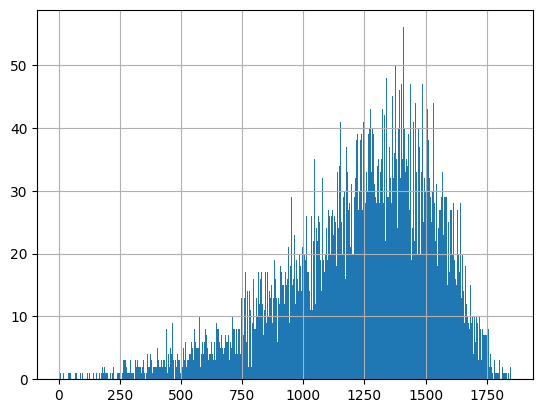

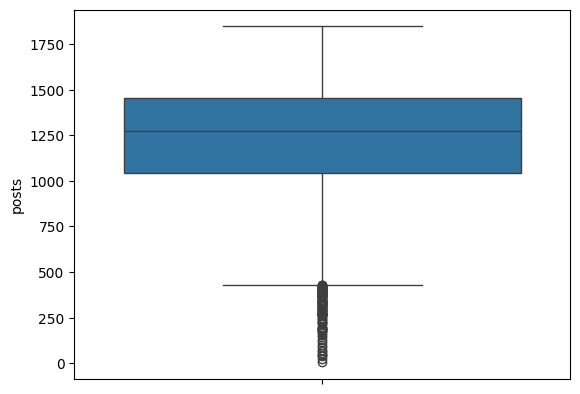

In [ ]:
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

In [ ]:
train['posts_length'] = train['posts'].apply(lambda x: len(x.split()))

- check dataset balancing

In [ ]:
train["type"].value_counts()

type
INFP    1466
INFJ    1176
INTP    1043
INTJ     873
ENTP     548
ENFP     540
ISTP     270
ISFP     217
ENTJ     185
ISTJ     164
ENFJ     152
ISFJ     133
ESTP      71
ESFP      38
ESFJ      33
ESTJ      31
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

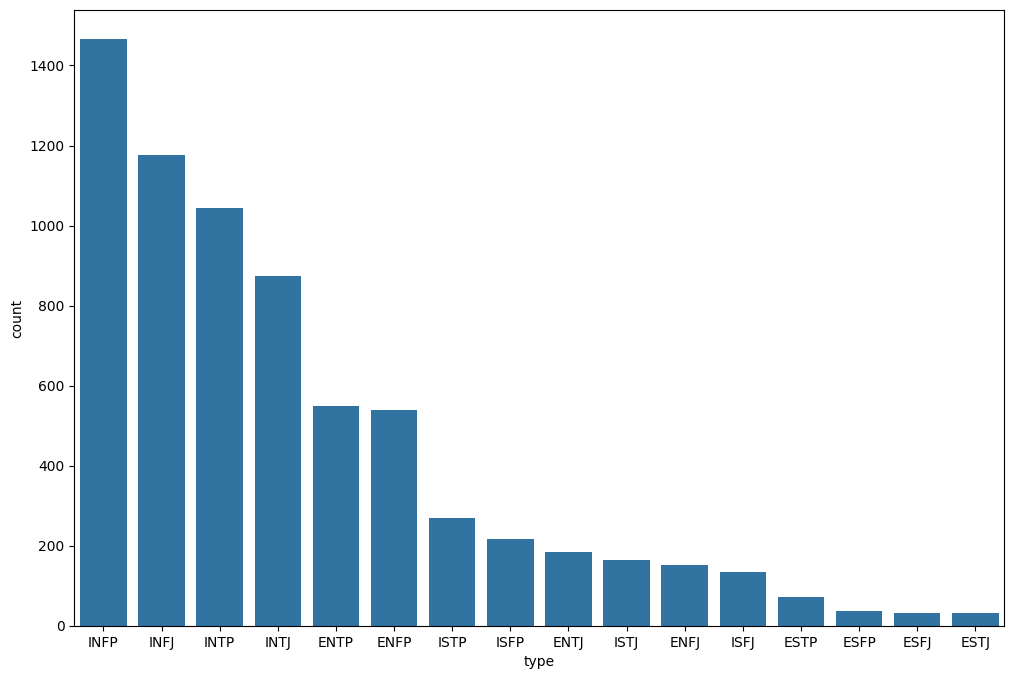

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=train["type"].value_counts())

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

In [ ]:
! pip install contractions
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import emoji
import contractions
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_txt(text):
    text = text.lower()  # Lower
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove Links
    text = re.sub(r':[a-z_]+:', '', text)  # Remove emojis
    text = re.sub(r'[^\w\s]', ' ', text)  # Keep only alphanumeric characters and spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\|\|+\s*\d+%\s*\|\|+', '', text)   # Remove redundant percentage and bar lines
    text = re.sub(r'\d+', '', text)   # Remove digits
    text = re.sub(r'\b\w\b', '', text)    # Remove any floating single char
    text = text.strip()   # Stripping
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word.lower() not in stop_words]    # Remove stopwors
    cleaned_words = [lemmatizer.lemmatize(word, pos='v') for word in cleaned_words]   # Lemmatization
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text


In [ ]:
for i in range(10) :
    text = train['posts'].iloc[i]
    print(text)

    clean_text = clean_txt(text)
    print(clean_text)
    print("_" * 120)

'this is actually exactly what i expected!  :laughing:  Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness!  (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread:  Name a famous person you don't like. mel gibson  What was the last thing you bought? groceries to make italian food  Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year...  eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season.  I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for sure,

In [ ]:
from sklearn.preprocessing import LabelEncoder

def clean_all_and_merge(train, val, test):
  train['clean_posts'] = train['posts'].apply(clean_txt)
  val['clean_posts'] = val['posts'].apply(clean_txt)
  test['clean_posts'] = test['posts'].apply(clean_txt)

  train.drop(columns=['posts'], inplace=True)
  val.drop(columns=['posts'], inplace=True)
  test.drop(columns=['posts'], inplace=True)

  # label_encoder = LabelEncoder()
  # y_train = label_encoder.fit_transform(train['type'])
  # y_val = label_encoder.transform(val['type'])
  # y_test = label_encoder.transform(test['type'])

  # y_train_df = pd.DataFrame(y_train, columns=['type_index']).reset_index(drop=True)
  # y_val_df = pd.DataFrame(y_val, columns=['type_index']).reset_index(drop=True)
  # y_test_df = pd.DataFrame(y_test, columns=['type_index']).reset_index(drop=True)

  # train_clean_df = pd.DataFrame(train_clean, columns=['posts']).reset_index(drop=True)
  # val_clean_df = pd.DataFrame(val_clean, columns=['posts']).reset_index(drop=True)
  # test_clean_df = pd.DataFrame(test_clean, columns=['posts']).reset_index(drop=True)

  # train = pd.concat([train_clean_df, y_train_df], axis=1)
  # val = pd.concat([val_clean_df, y_val_df], axis=1)
  # test = pd.concat([test_clean_df, y_test_df], axis=1)

  return train, val, test

In [ ]:
train, val, test = clean_all_and_merge(train, val, test)

In [ ]:
train.head()

,type,clean_posts
8331,INFP,actually exactly expect introversion extroversion intuitive time chill come boundless insanity awesomeness notice weird tense perspective sentence speak universe go post actually read entire thread name famous person like mel gibson last thing buy groceries make italian food name work programmer high school go college comp sci year eventually decide something enjoy something want buy whenever possible adjust cook habit accommodate local organic season also cut corner part budget sacrifice sure epic fail average last years day better one come mm agree need compassion plenty justice justice mean people act superior wrong would suffice also think justice feel love intense unreasonable know never able share even express much exactly type explanation think would elaborate nearly identical write girl fall come tonite cook dinner think feel absolutely delight terrify mostly delight though sort thing happen good intentioned people take write word literally thousands years never mystical ex...
1290,ISTP,nope ever busy work cause adrenaline rush activities anything make sure one keep freedom forever think today decide arrive conclusion never really understand negative feel past try repress hop would go away would often guy find miscommunicating others use lingo talk others remember djarendee post back say speak like would cut worm see would happen heck kind question think chessboxing would totally awesome sport istp lumbar puncture clinic earthquake rock roll begin let go needle already patient like okay wait get boy man actually never really love mom speak workaholic work dad office assistant also nurse take lot shift like say love poor delivery gravelly voice help mean seriously pick one ladies want jack bauer usher say love hay baybay yo fanta say like dance play guitar like art museums interact art hand star away make weird comment style see hell unwanted center attention justin bieber lady gaga wannabe place bet general question guy deal put hot seat unwillingly back child beg...
1982,ENFJ,yes peace absence conflict infp friend suxx hardd ideal peace would everybody exactly say would totally happy relax content go reallybriefly respond yes formalize way recognize debate think also really help intuitive could probably yeah say like nietzsche either think mean say assert external environment basically goals make reality bend reality yes true person give also garner favor actually exactly keep say give much attempt garner power favor first totally relate every feel describe specifically post break fall go vomit thoughts subject predicament specifically know enfj estp relationships look like healthy talk romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow go town motown bloat clown walk street aquiesence mmm give quick response maybe go depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty much every job months feel good fit lol make trump great yeah let frankly...
769,INFP,apologize delay response thank take time share experience helpful hear good boundaries come time instantly sorry think exactly need hear boundaries neediness etc exactly work right well develop healthy self image nice know thank input deal rejection confrontation etc definitely things think right thing recognize people negative raise infp counselors therapists etc challenge experience field strongly consider counsel career would love input fellow infps yes think find right type logical infp perhaps infp nevertheless anyway thank interest get enfp obviously depend individual person could see interest infj yep sigh inbox full hmm yeah would frustrate wonder reframing would help look new challenge something something worth time effort sorry feel boat many time hunt good job fit personality well mind ask industry gosh struggle right actually think blog post need write apparently much rather often find need would hate make choice woul

**You  are doing Great so far!**

# Four Characters [1] [2] [3] [4]

# [1] `Mind` : Extrovert {E} - Introvert {I}

# [2] `Energy` : Intuitive {N} - Sensing {S}

# [3] `Nature` : Thinking {T} - Feeling {F}

# [4] `Tactics` : Judging {J} - Perceiving {P}

# **Binary Encoding :**

In [ ]:
def personality(df):
  df['Mind'] = df['type'].map(lambda x: 'Extroverted'
                                    if x[0] == 'E' else 'Introverted')
  df['Energy'] = df['type'].map(lambda x: 'Intuitive'
                                      if x[1] == 'N' else 'Sensing')
  df['Nature'] = df['type'].map(lambda x: 'Thinking'
                                      if x[2] == 'T' else 'Feeling')
  df['Tactics'] = df['type'].map(lambda x: 'Judging'
                                      if x[3] == 'J' else 'Perceiving')

  df['E'] = df['type'].apply(lambda x: x[0] == 'E').astype('int')
  df['N'] = df['type'].apply(lambda x: x[1] == 'N').astype('int')
  df['T'] = df['type'].apply(lambda x: x[2] == 'T').astype('int')
  df['J'] = df['type'].apply(lambda x: x[3] == 'J').astype('int')


In [ ]:
personality(train)
personality(val)
personality(test)

In [ ]:
train.head()

,type,clean_posts,Mind,Energy,Nature,Tactics,E,N,T,J
8331,INFP,actually exactly expect introversion extroversion intuitive time chill come boundless insanity awesomeness notice weird tense perspective sentence speak universe go post actually read entire thread name famous person like mel gibson last thing buy groceries make italian food name work programmer high school go college comp sci year eventually decide something enjoy something want buy whenever possible adjust cook habit accommodate local organic season also cut corner part budget sacrifice sure epic fail average last years day better one come mm agree need compassion plenty justice justice mean people act superior wrong would suffice also think justice feel love intense unreasonable know never able share even express much exactly type explanation think would elaborate nearly identical write girl fall come tonite cook dinner think feel absolutely delight terrify mostly delight though sort thing happen good intentioned people take write word literally thousands years never mystical ex...,Introverted,Intuitive,Feeling,Perceiving,0,1,0,0
1290,ISTP,nope ever busy work cause adrenaline rush activities anything make sure one keep freedom forever think today decide arrive conclusion never really understand negative feel past try repress hop would go away would often guy find miscommunicating others use lingo talk others remember djarendee post back say speak like would cut worm see would happen heck kind question think chessboxing would totally awesome sport istp lumbar puncture clinic earthquake rock roll begin let go needle already patient like okay wait get boy man actually never really love mom speak workaholic work dad office assistant also nurse take lot shift like say love poor delivery gravelly voice help mean seriously pick one ladies want jack bauer usher say love hay baybay yo fanta say like dance play guitar like art museums interact art hand star away make weird comment style see hell unwanted center attention justin bieber lady gaga wannabe place bet general question guy deal put hot seat unwillingly back child beg...,Introverted,Sensing,Thinking,Perceiving,0,0,1,0
1982,ENFJ,yes peace absence conflict infp friend suxx hardd ideal peace would everybody exactly say would totally happy relax content go reallybriefly respond yes formalize way recognize debate think also really help intuitive could probably yeah say like nietzsche either think mean say assert external environment basically goals make reality bend reality yes true person give also garner favor actually exactly keep say give much attempt garner power favor first totally relate every feel describe specifically post break fall go vomit thoughts subject predicament specifically know enfj estp relationships look like healthy talk romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow go town motown bloat clown walk street aquiesence mmm give quick response maybe go depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty much every job months feel good fit lol make trump great yeah let frankly...,Extroverted,Intuitive,Feeling,Judging,1,1,0,1
769,INFP,apologize delay response thank take time share experience helpful hear good boundaries come time instantly sorry think exactly need hear boundaries neediness etc exactly work right well develop healthy self image nice know thank input deal rejection confrontation etc definitely things think right thing recognize people negative raise infp counselors therapists etc challenge experience field strongly consider counsel career would love input fellow infps yes think find right type logical infp perhaps infp nevertheless anyway thank interest get enfp obviously depend individual person could see interest infj yep sigh inbox full hmm yeah would frustrate wonder reframing would help look new challenge something something worth time effort sorry feel boat many ti

### Modelling

In [ ]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

print(get_longest_text(train['clean_posts']))
print(get_longest_text(val['clean_posts']))
print(get_longest_text(test['clean_posts']))

914
848
881


<Axes: ylabel='clean_posts'>

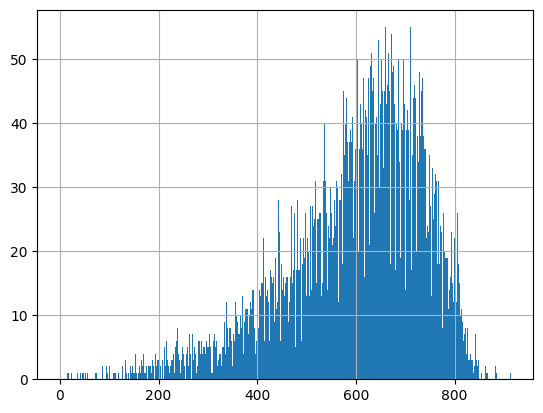

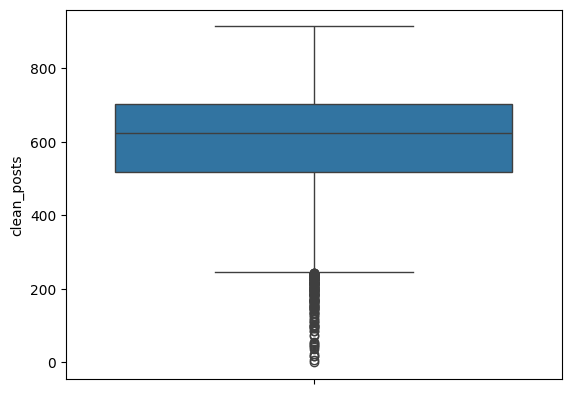

In [ ]:
ser = train['clean_posts'].apply(lambda x: len(x.split()))
ser.describe()
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

max_seq_len = 750
word2idx = tf.keras.datasets.imdb.get_word_index()

tokenizer = Tokenizer(num_words=max_seq_len)
tokenizer.fit_on_texts(train['clean_posts'])
word_to_idx = tokenizer.word_index

1641221/1641221 [==============================] - 1s 1us/step


In [ ]:
x_train_padded = np.empty((len(train), max_seq_len), dtype=int)

for i, sent in enumerate(train['clean_posts']):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_train_padded[i, :] = padded_sent_ids


In [ ]:
x_val_padded = np.empty((len(val), max_seq_len), dtype=int)

for i, sent in enumerate(val['clean_posts']):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_val_padded[i, :] = padded_sent_ids

In [ ]:
x_test_padded = np.empty((len(test), max_seq_len), dtype=int)

for i, sent in enumerate(test['clean_posts']):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_test_padded[i, :] = padded_sent_ids

In [ ]:
x_train_padded[:1]

array([[   51,   194,   437,  1264,  1867,   778,    13,  1416,    33,
        13902,  4105,  4079,   235,   288,  3850,   703,  1042,   210,
          985,    12,    45,    51,    43,   688,    65,   239,  1735,
           53,     1, 10851,  9559,   131,    46,   480,  6572,    11,
         2768,   533,   239,    31,  4498,   168,   117,    12,   385,
         6921,  2471,   162,   907,   317,    25,   150,    25,    15,
          480,   628,   318,  2622,  1006,   984,  4919,  1652,  3954,
         1086,    27,   698,  1530,   132,  4561,  2259,    55,  2169,
          641,   859,   131,    80,    96,    92,     8,    33,  3528,
           95,    42,  2850,  1095,  2016,  2016,    36,     4,   246,
         1935,   176,    10,  5515,    27,     2,  2016,     7,    17,
          929,  5696,     5,    38,   224,   222,    30,   494,    18,
          194,    14,  1299,     2,    10,  1554,  1023,  4080,    98,
          219,   361,    33, 38664,  1006,  1550,     2,     7,   402,
      

In [ ]:
VOCAB_SIZE = len(word_to_idx)
x_train_padded = np.clip(x_train_padded, 0, VOCAB_SIZE - 1)
x_val_padded = np.clip(x_val_padded, 0, VOCAB_SIZE - 1)
x_test_padded = np.clip(x_test_padded, 0, VOCAB_SIZE - 1)

In [ ]:
y_train = train[['E', 'N', 'T', 'J']]
y_val = val[['E', 'N', 'T', 'J']]

In [ ]:
y_train.head()

,E,N,T,J
8331,0,1,0,0
1290,0,0,1,0
1982,1,1,0,1
769,0,1,0,0
8339,0,1,0,0


In [ ]:
print(y_val.shape)
print(y_train.shape)


(867, 4)
(6940, 4)


In [ ]:
class LossMetric(tf.keras.metrics.Metric):
    def __init__(self, name='loss', **kwargs):
        super(LossMetric, self).__init__(name=name, **kwargs)
        self.loss_tracker = self.add_weight(name='loss', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
        self.loss_tracker.assign(tf.reduce_mean(loss))

    def result(self):
        return self.loss_tracker

    def reset_states(self):
        self.loss_tracker.assign(0.0)


In [ ]:
num_classes = y_train.shape[1]
num_classes

4

In [ ]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 512),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(128)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])


# Option 2: Use a LSTM cell
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])

# Option 3: Use a GRU cell
# model3 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.GRUCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [ ]:
history1 = model1.fit(x_train_padded, y_train, epochs=10, batch_size=128,
                    validation_data=(x_val_padded, y_val),
                    validation_steps=1)

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 2.9830 - categorical_accuracy: 0.6458 - precision_6: 0.7361

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


55/55 [==============================] - 52s 915ms/step - loss: 2.9830 - categorical_accuracy: 0.6458 - precision_6: 0.7361 - val_loss: 2.9668 - val_categorical_accuracy: 0.6328 - val_precision_6: 0.8359
Epoch 2/10
55/55 [==============================] - 46s 841ms/step - loss: 2.9686 - categorical_accuracy: 0.6568 - precision_6: 0.7875 - val_loss: 3.1517 - val_categorical_accuracy: 0.6328 - val_precision_6: 0.6974
Epoch 3/10
55/55 [==============================] - 44s 804ms/step - loss: 2.5713 - categorical_accuracy: 0.6575 - precision_6: 0.7847 - val_loss: 3.1048 - val_categorical_accuracy: 0.6250 - val_precision_6: 0.7718
Epoch 4/10
55/55 [==============================] - 45s 823ms/step - loss: 3.3171 - categorical_accuracy: 0.6491 - precision_6: 0.7815 - val_loss: 2.9543 - val_categorical_accuracy: 0.6328 - val_precision_6: 0.8162
Epoch 5/10
55/55 [==============================] - 45s 820ms/step - loss: 3.3437 - categorical_accuracy: 0.6503 - precision_6: 0.7340 - val_loss: 3.16

In [ ]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
# model1 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


# Option 2: Use a LSTM cell
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 512),
    tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

# Option 3: Use a GRU cell
# model3 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.GRUCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [ ]:
history2 = model2.fit(x_train_padded, y_train, epochs=10, batch_size=128,
                    validation_data=(x_val_padded, y_val),
                    validation_steps=1)

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 2.9119 - categorical_accuracy: 0.6494 - precision_7: 0.7683

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


55/55 [==============================] - 73s 1s/step - loss: 2.9119 - categorical_accuracy: 0.6494 - precision_7: 0.7683 - val_loss: 2.9546 - val_categorical_accuracy: 0.6328 - val_precision_7: 0.8359
Epoch 2/10
55/55 [==============================] - 65s 1s/step - loss: 2.8408 - categorical_accuracy: 0.6568 - precision_7: 0.7953 - val_loss: 3.0664 - val_categorical_accuracy: 0.6328 - val_precision_7: 0.8359
Epoch 3/10
55/55 [==============================] - 66s 1s/step - loss: 3.7634 - categorical_accuracy: 0.6568 - precision_7: 0.7901 - val_loss: 3.1491 - val_categorical_accuracy: 0.6328 - val_precision_7: 0.8359
Epoch 4/10
55/55 [==============================] - 64s 1s/step - loss: 3.1868 - categorical_accuracy: 0.6634 - precision_7: 0.7692 - val_loss: 3.0640 - val_categorical_accuracy: 0.6328 - val_precision_7: 0.8182
Epoch 5/10
55/55 [==============================] - 67s 1s/step - loss: 2.8013 - categorical_accuracy: 0.6656 - precision_7: 0.7973 - val_loss: 3.1123 - val_catego

In [ ]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]


# Option 1: Use a SimpleRNN cell
# model1 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])


# Option 2: Use a LSTM cell
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE, 512),
#     tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='sigmoid')
# ])

# Option 3: Use a GRU cell
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 512),
    tf.keras.layers.RNN(tf.keras.layers.GRUCell(128)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])


model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [ ]:
history3 = model3.fit(x_train_padded, y_train, epochs=10, batch_size=128,
                    validation_data=(x_val_padded, y_val),
                    validation_steps=1)

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 3.0414 - categorical_accuracy: 0.6439 - precision_8: 0.7746

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


55/55 [==============================] - 85s 2s/step - loss: 3.0414 - categorical_accuracy: 0.6439 - precision_8: 0.7746 - val_loss: 2.9959 - val_categorical_accuracy: 0.6328 - val_precision_8: 0.8359
Epoch 2/10
55/55 [==============================] - 84s 2s/step - loss: 2.3364 - categorical_accuracy: 0.6568 - precision_8: 0.8067 - val_loss: 3.1870 - val_categorical_accuracy: 0.6328 - val_precision_8: 0.8359
Epoch 3/10
55/55 [==============================] - 84s 2s/step - loss: 3.2795 - categorical_accuracy: 0.6578 - precision_8: 0.8123 - val_loss: 2.9073 - val_categorical_accuracy: 0.6328 - val_precision_8: 0.8295
Epoch 4/10
55/55 [==============================] - 83s 2s/step - loss: 2.7573 - categorical_accuracy: 0.6644 - precision_8: 0.7965 - val_loss: 3.4579 - val_categorical_accuracy: 0.6250 - val_precision_8: 0.8168
Epoch 5/10
55/55 [==============================] - 86s 2s/step - loss: 3.0295 - categorical_accuracy: 0.6607 - precision_8: 0.8012 - val_loss: 3.2662 - val_catego

#### Evaluation

**Evaluation metric:**
Precision

### Enhancement

### Conclusion and final results


#### Done!